In [1]:
import cv2
import numpy as np

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
import tensorflow as tf
from tensorflow import keras


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [4]:
import pathlib

In [5]:
url="covid facemask detection"

In [6]:
url=pathlib.Path(url)

In [7]:
data={"without_mask":list(url.glob("without_mask/*"))[:100],
      "with_mask":list(url.glob("with_mask/*"))[:100]}

In [8]:
len(data["with_mask"])

100

In [9]:
data_index={"without_mask":0,
            "with_mask":1}

In [10]:
x,y=[],[]
for nam,lis in data.items():
  for l in lis:
    img_array=cv2.imread(str(l))
    img_resize=cv2.resize(img_array,(224,224))
    x.append(img_resize)
    y.append(data_index[nam])

In [11]:
x=np.array(x)
y=np.array(y)

In [12]:
x=x/255

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [14]:
model=keras.Sequential([
        keras.layers.Conv2D(filters=3,kernel_size=(3,3),padding="same",input_shape=(224,224,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=3,kernel_size=(3,3),padding="same"),
        keras.layers.MaxPooling2D((2,2)),

        keras.layers.Flatten(),
        keras.layers.Dense(90,activation="relu"),
        keras.layers.Dense(80,activation="relu"),
        keras.layers.Dense(1,activation="sigmoid")
])
model.compile(
    optimizer="SGD",
    loss="BinaryCrossentropy",
    metrics=["accuracy"]
)
model.fit(x,y,epochs=20)

Epoch 1/20
7/7 [==============================] - 3s 330ms/step - loss: 0.6938 - accuracy: 0.4950
Epoch 2/20
7/7 [==============================] - 3s 358ms/step - loss: 0.6581 - accuracy: 0.6400
Epoch 3/20
7/7 [==============================] - 3s 415ms/step - loss: 0.6506 - accuracy: 0.5700
Epoch 4/20
7/7 [==============================] - 2s 337ms/step - loss: 0.5964 - accuracy: 0.7750
Epoch 5/20
7/7 [==============================] - 2s 334ms/step - loss: 0.6113 - accuracy: 0.6950
Epoch 6/20
7/7 [==============================] - 2s 332ms/step - loss: 0.5342 - accuracy: 0.7800
Epoch 7/20
7/7 [==============================] - 2s 326ms/step - loss: 0.4870 - accuracy: 0.8150
Epoch 8/20
7/7 [==============================] - 2s 349ms/step - loss: 0.5336 - accuracy: 0.7400
Epoch 9/20
7/7 [==============================] - 3s 358ms/step - loss: 0.4408 - accuracy: 0.8200
Epoch 10/20
7/7 [==============================] - 2s 335ms/step - loss: 0.4198 - accuracy: 0.8200
Epoch 11/20
7/7 [==

In [15]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [16]:
test_url="covid facemask detection"

In [17]:
test_url=pathlib.Path(test_url)

In [18]:
test_data={"without_mask":list(test_url.glob("without_mask/*"))[100:200],
          "with_mask":list(test_url.glob("with_mask/*"))[100:200]}

In [19]:
x_tes,y_tes=[],[]
for nam,lis in test_data.items():
  for l in lis:
    img_array=cv2.imread(str(l))
    img_resize=cv2.resize(img_array,(224,224))
    x_tes.append(img_resize)
    y_tes.append(data_index[nam])

In [20]:
x_tes=np.array(x_tes)
y_tes=np.array(y_tes)

In [21]:
x_tes=x_tes/255

In [22]:
model.evaluate(x_tes,y_tes)

7/7 [==============================] - 1s 152ms/step - loss: 0.4741 - accuracy: 0.7700


[0.47409290075302124, 0.7699999809265137]

In [23]:
#save_url=pathlib.Path(save_url)

In [24]:
#sa=save_url.glob("generator/")

In [25]:
color=[255,0,0]

In [26]:
color_tu=tuple((int(color[0]),int(color[1]),int(color[2])))

In [27]:
color_tu

(255, 0, 0)

In [45]:
cap=cv2.VideoCapture(0)
count=0
address="https://192.168.100.21:8080/video"
cap.open(address)
while True:
  check,img=cap.read()
  #print(img.shape)
  #print(img)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face=faceCascade.detectMultiScale(gray,1.2,5)
  #for (x,y,h,w) in face:
       #cv2.rectangle(img,(x+y),(x+h,y+w),(255,0,0),1)
  img_res=cv2.resize(img,(224,224))
  img_res=img_res.reshape(1,224,224,3)
  predict=model.predict(img_res)
  print(predict)
  if predict[0,0]<0.5:
        result="without_mask"
        #print("Gaurav face found")
  else:
        result="with_mask"
        #print("Ganesh face found")
        count+=1
        save_url="./face recognisation/generate/"+str(count)+".jpg"
        cv2.imwrite(save_url,img)
  image=cv2.putText(img,result,(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1,cv2.LINE_AA)
  cv2.imshow("predict",image)
  if cv2.waitKey(1)==ord("f"):
    break
cap.release()
cv2.destroyAllWindows()

[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]

In [29]:
img="new"

In [30]:
img=pathlib.Path(img)

In [31]:
img

WindowsPath('new')

In [32]:
img_array=cv2.imread(str(list(img.glob("test/*"))[1]))

In [33]:
img_resize=cv2.resize(img_array,(224,224))

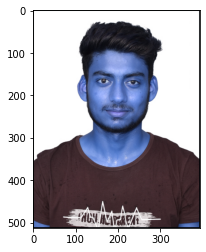

In [34]:
plt.imshow(img_array)

In [35]:
x_test=np.array(img_resize)

In [36]:
x_test=x_test/255

In [37]:
x_test.shape

(224, 224, 3)

In [38]:
x_t=x_test.reshape(1,224,224,3)

In [39]:
model.predict(x_t)

array([[0.7111922]], dtype=float32)